In [1]:
library(tidyverse)
library(reticulate)
library(R.matlab)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

R.matlab v3.6.2 (2018-09-26) successfully loaded. See ?R.matlab for help.


Attaching package: ‘R.matlab’


The following objects are masked from ‘package:base’:

    getOption, isOpen




In [2]:
np <- import("numpy")
pwms <- np$load("../out/PWMs_max_active_per_seq.npy")

In [3]:
str(pwms)

 num [1:320, 1:4, 1:8] 2.20e-06 1.58e-01 8.91e-02 6.28e-01 9.56e-02 ...


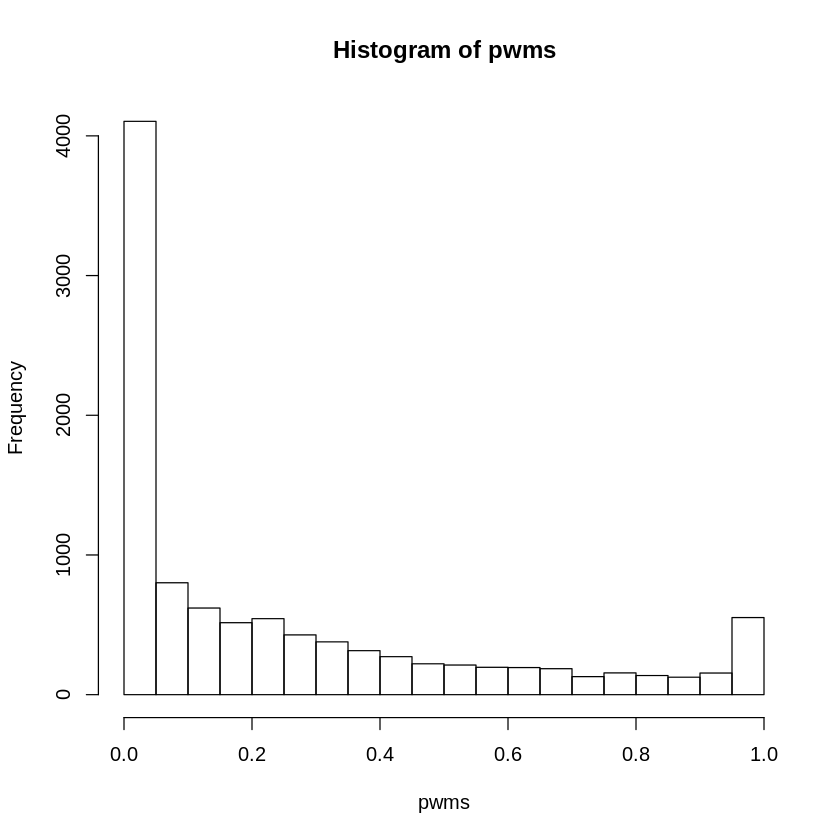

In [4]:
hist(pwms)

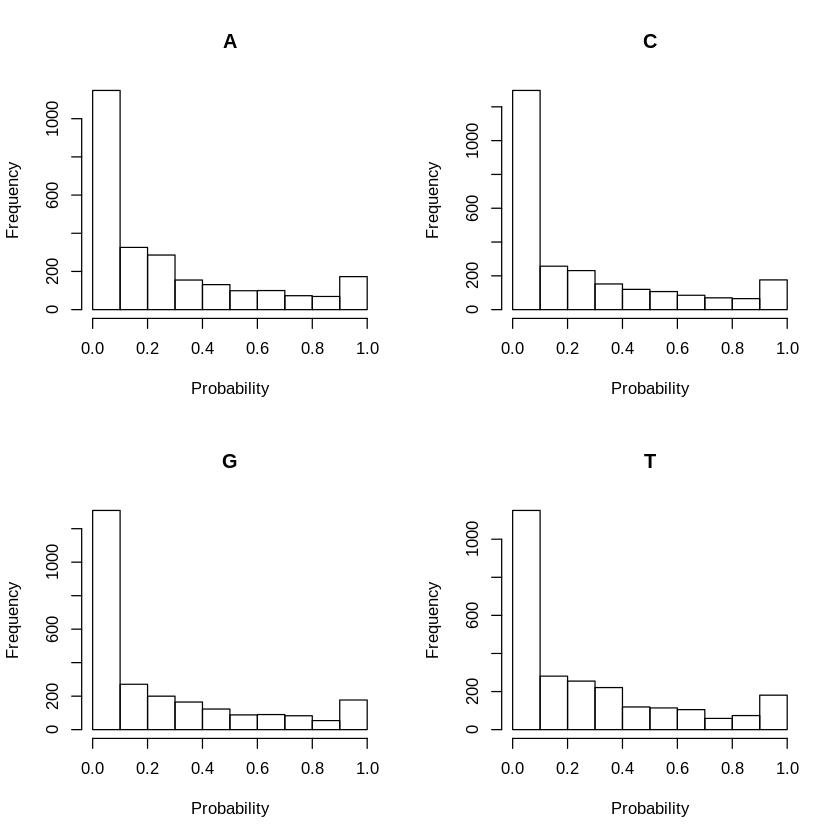

In [5]:
par(mfrow = c(2, 2))
for (i in 1:4) {
    hist(pwms[, i, ], main = c("A", "C", "G", "T")[i], xlab = "Probability")
}

In [6]:
consensus_pwms_probs = apply(pwms, 1, FUN = function(X) apply(X, 2, max))
str(consensus_pwms_probs)

 num [1:8, 1:320] 0.997 0.832 0.87 1 0.594 ...


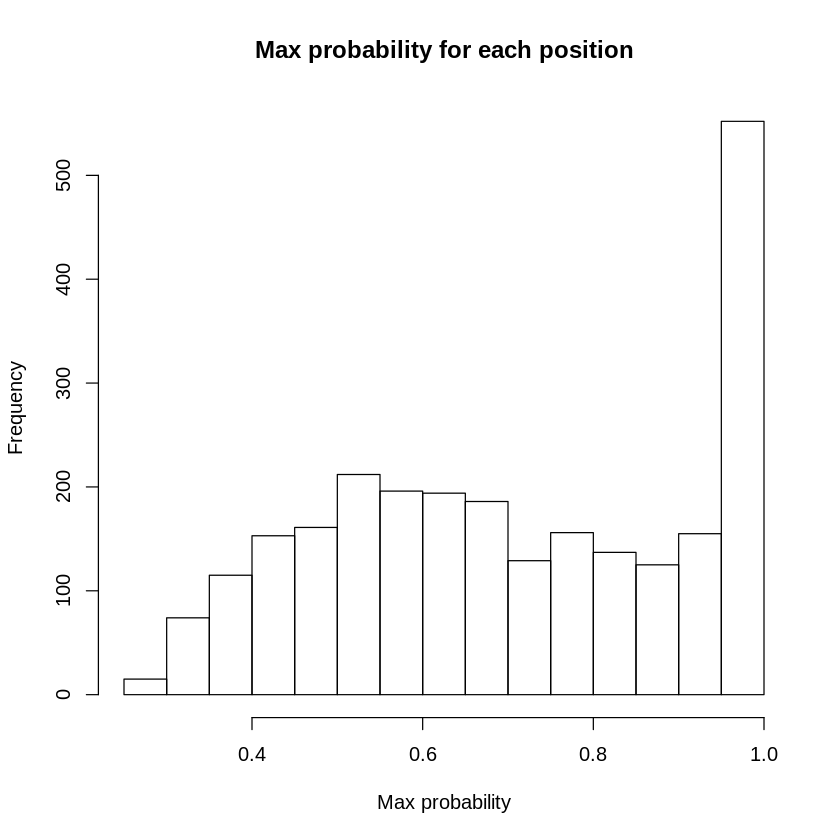

In [9]:
hist(consensus_pwms_probs, main = "Max probability for each position", xlab = "Max probability")

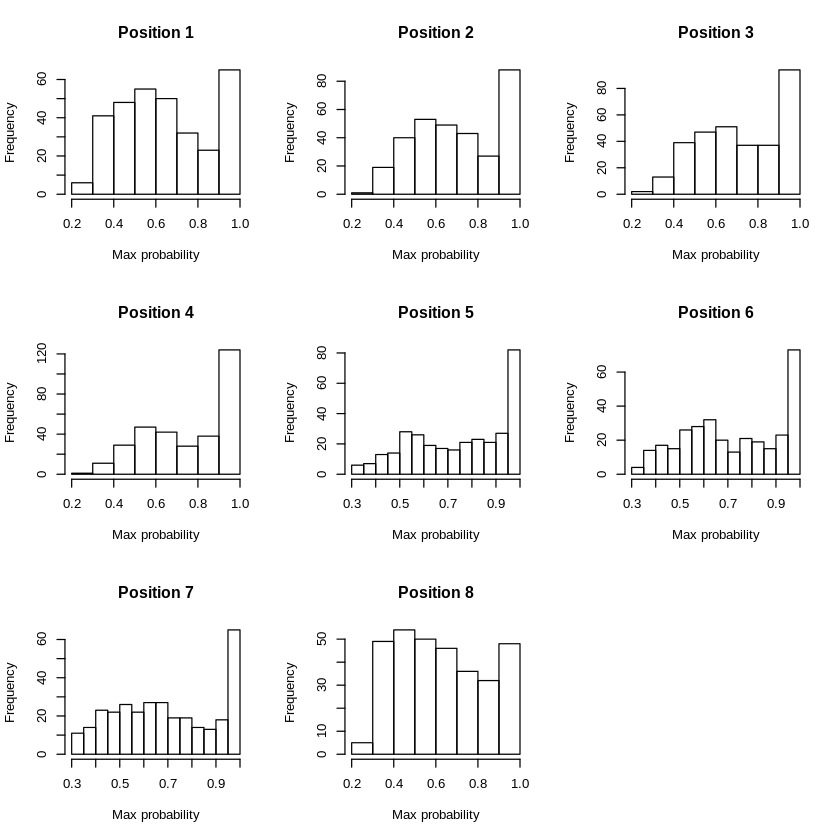

In [10]:
par(mfrow = c(3, 3))
for (i in 1:8) {
    hist(consensus_pwms_probs[i, ], main = paste("Position", i), xlab = "Max probability")
}

In [11]:
str(pwms)

 num [1:320, 1:4, 1:8] 2.20e-06 1.58e-01 8.91e-02 6.28e-01 9.56e-02 ...


In [12]:
colSums(pwms[1, , ])

[1] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
[8] 0.9999978

In [13]:
consensus_pwms = apply(pwms, 1, FUN = function(X) apply(X, 2, which.max))
str(consensus_pwms)

 int [1:8, 1:320] 2 2 3 1 2 3 3 2 4 2 ...


In [14]:
table(consensus_pwms)

consensus_pwms
  1   2   3   4 
635 638 616 671 

In [15]:
prop.table(table(consensus_pwms))

consensus_pwms
        1         2         3         4 
0.2480469 0.2492187 0.2406250 0.2621094 

In [16]:
n_filters = 320
flip_dist = matrix(0, nrow = n_filters, ncol = n_filters)
for (i in 1:n_filters) {
    for (j in (i + 1):n_filters) {
        if (j > n_filters) {
            next
        }
        flips <- sum(consensus_pwms[, i] != consensus_pwms[, j])
        flip_dist[i, j] <- flips
        flip_dist[j, i] <- flips
    }
}

In [17]:
table(flip_dist)

flip_dist
    0     1     2     3     4     5     6     7     8 
  326    48   482  2404  8934 20966 31202 27240 10798 

In [18]:
round(prop.table(table(flip_dist)), 4)

flip_dist
     0      1      2      3      4      5      6      7      8 
0.0032 0.0005 0.0047 0.0235 0.0872 0.2047 0.3047 0.2660 0.1054 

In [19]:
str(pwms)

 num [1:320, 1:4, 1:8] 2.20e-06 1.58e-01 8.91e-02 6.28e-01 9.56e-02 ...


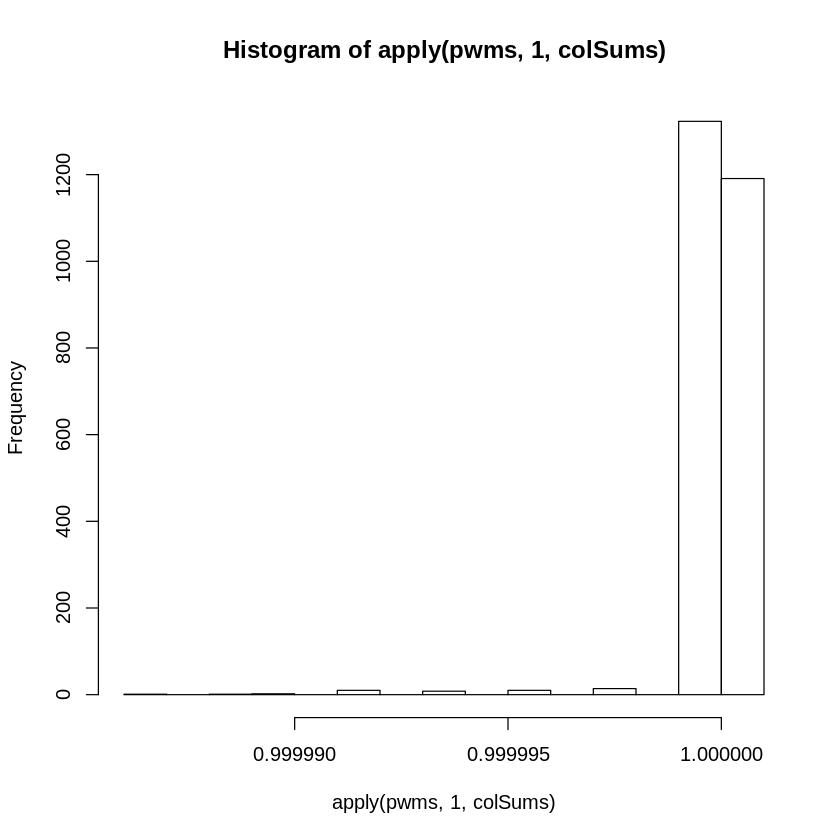

In [20]:
hist(apply(pwms, 1, colSums))